In [1]:
import numpy as np
import matplotlib.pyplot as plt

from redplanet import GRS
from redplanet import Crust

from redplanet import utils

In [2]:
Crust.load_topo()

In [3]:
Crust.get_rawdata('xarray')

<xarray.Dataset> Size: 52MB
Dimensions:  (lat: 1801, lon: 3601)
Coordinates:
  * lat      (lat) float64 14kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
  * lon      (lon) float64 29kB -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Data variables:
    topo     (lat, lon) float64 52MB 3.382e+03 3.382e+03 ... 3.376e+03 3.376e+03
Attributes:
    units:         km
    grid_spacing:  0.1
    lmax:          899
    topo_model:    MarsTopo2600

In [4]:
RIM               = 'Khan2022'
insight_thickness = 39
rho_north         = 2900
rho_south         = 2900

Crust.load_model(
    RIM               = RIM,
    insight_thickness = insight_thickness,
    rho_north         = rho_north,
    rho_south         = rho_south
)

True

In [5]:
# utils.print_dict(Crust.get_rawdata('dict'))
Crust.get_rawdata('xarray')

<xarray.Dataset> Size: 104MB
Dimensions:  (lat: 1801, lon: 3601)
Coordinates:
  * lat      (lat) float64 14kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
  * lon      (lon) float64 29kB -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Data variables:
    topo     (lat, lon) float64 52MB 3.382e+03 3.382e+03 ... 3.376e+03 3.376e+03
    moho     (lat, lon) float64 52MB 3.309e+03 3.309e+03 ... 3.343e+03 3.343e+03
Attributes:
    units:                         km
    grid_spacing:                  0.1
    lmax:                          899
    topo_model:                    MarsTopo2600
    moho_model_name:               Khan2022-39-2900-2900
    moho_model_RIM:                Khan2022
    moho_model_insight_thickness:  39
    moho_model_rho_north:          2900
    moho_model_rho_south:          2900

<class 'numpy.ndarray'>


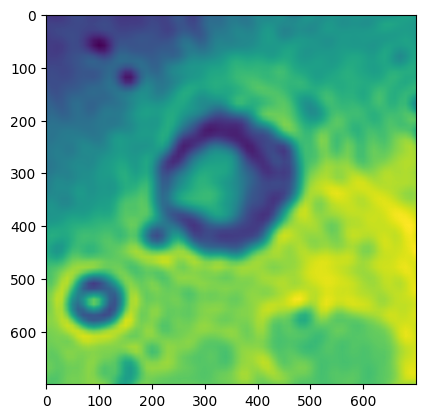

In [6]:
lons = np.arange(20,27,0.01)
lats = np.arange(7,14,0.01)[::-1]

dat_crust = Crust.get_region('topo', lons=lons, lats=lats, interpolate=True)
print(type(dat_crust))

plt.imshow(dat_crust)

In [7]:
dat_crust = Crust.get_region('crthick', lons=lons, lats=lats, interpolate=True, as_xarray=True)
print(type(dat_crust))

dat_crust

<class 'xarray.core.dataarray.DataArray'>


<xarray.DataArray (lat: 700, lon: 700)> Size: 4MB
array([[46.98913379, 46.99070646, 46.99227913, ..., 55.21737883,
        55.20882304, 55.20026724],
       [47.02110114, 47.02264419, 47.02418723, ..., 55.21477633,
        55.20604637, 55.19731641],
       [47.0530685 , 47.05458192, 47.05609534, ..., 55.21217382,
        55.2032697 , 55.19436559],
       ...,
       [56.99208806, 56.99951245, 57.00693685, ..., 58.90592553,
        58.91217752, 58.91842951],
       [56.99772067, 57.00538157, 57.01304247, ..., 58.87500408,
        58.88124294, 58.8874818 ],
       [57.00335327, 57.01125068, 57.01914808, ..., 58.84408263,
        58.85030836, 58.85653409]])
Coordinates:
  * lon      (lon) float64 6kB 20.0 20.01 20.02 20.03 ... 26.97 26.98 26.99
  * lat      (lat) float64 6kB 13.99 13.98 13.97 13.96 ... 7.03 7.02 7.01 7.0

---
# "Power users"

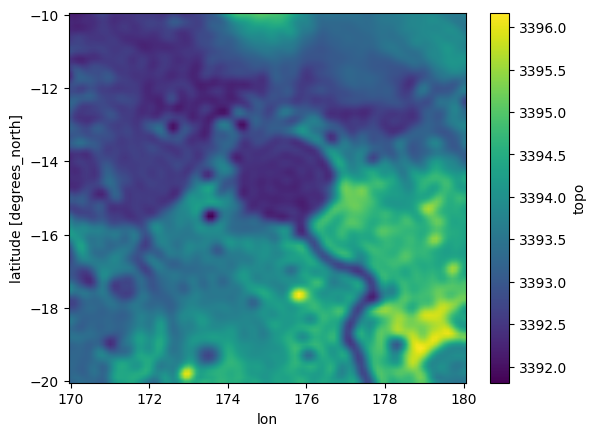

In [8]:
dat_xr = Crust.get_rawdata('xarray')

gusev = dat_xr.sel(lon=slice(170,180), lat=slice(-20,-10))

# gusev.lat

topo = gusev.topo
moho = gusev.moho
crthick = topo-moho

topo.plot.imshow(interpolation='bilinear')
# moho.plot.imshow(interpolation='bilinear')
# crthick.plot.imshow(interpolation='bilinear')

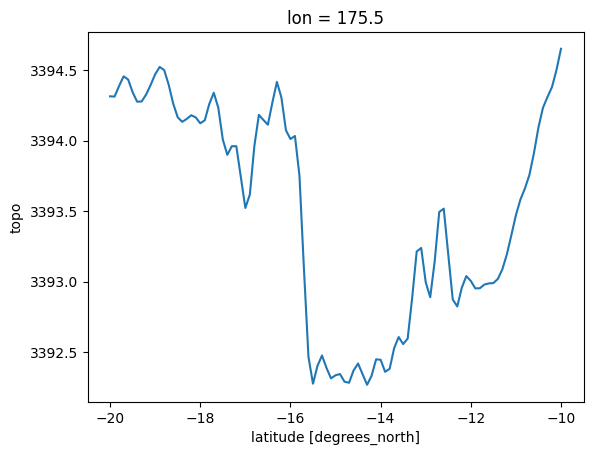

In [9]:
gusev_slice = dat_xr.sel(lon=175.5, lat=slice(-20,-10))
gusev_slice.topo.plot()